# Clustering - Airlines Data

# Import necessary Data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Import Data

In [2]:
airline = pd.read_excel('D:\Downloads\EastWestAirlines.xlsx',sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data understanding

In [3]:
airline.shape

(3999, 12)

In [4]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Hierarchical clustering

In [6]:
def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return (x)

In [7]:
hier_airline = norm_func(airline.iloc[:,1:])
hier_airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


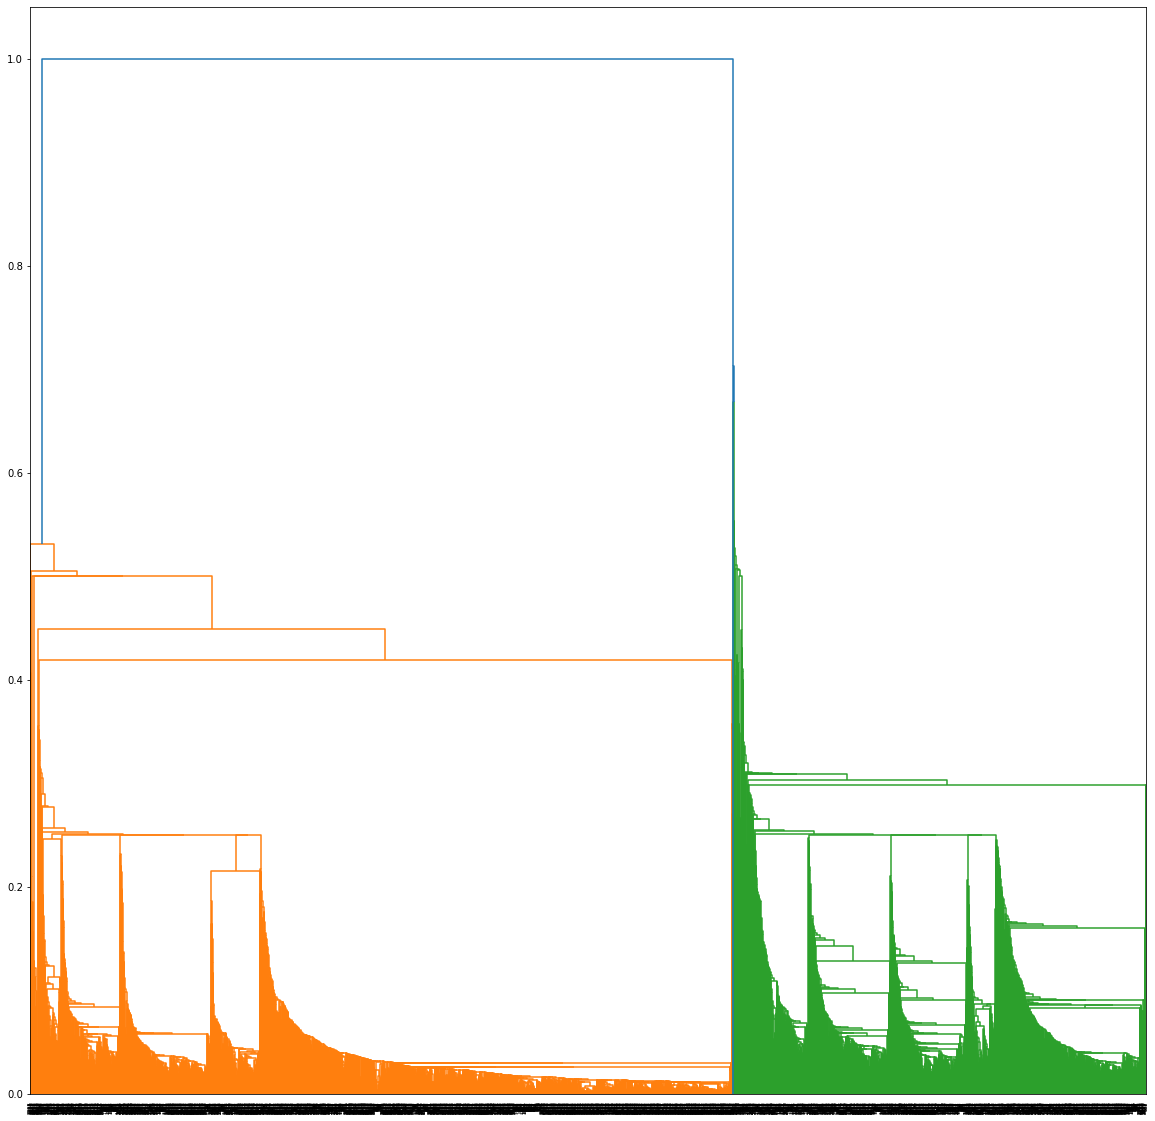

In [8]:
plt.figure(figsize=(20,20))
hier_airline1 = sch.dendrogram(sch.linkage(hier_airline , method = 'single'))

In [9]:
from sklearn.cluster import AgglomerativeClustering
hier_airline2 = AgglomerativeClustering(n_clusters = 4 ,affinity = 'euclidean', linkage = 'single')
hier_airline2

AgglomerativeClustering(linkage='single', n_clusters=4)

In [10]:
hier_airline3 = hier_airline2.fit_predict(hier_airline)
hier_airline3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [11]:
hier_airline4  = pd.DataFrame(hier_airline3,columns=['clustering'])
hier_airline4

,clustering
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [12]:
import copy
airline1 = copy.copy(airline)
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
airline1['clustering'] = hier_airline4
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [14]:
airline1[airline1['clustering'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [15]:
airline1[airline1['clustering'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [16]:
airline1[airline1['clustering'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,2


In [17]:
airline1[airline1['clustering'] == 3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
2840,2862,8557,0,1,1,1,200622,5,622,3,1955,1,3


# K - Means clustering

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmean = scaler.fit_transform(airline.iloc[:,1:])
print(kmean)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmean1 = KMeans(n_clusters=i,random_state=0)
    kmean1.fit(kmean)
    wcss.append(kmean1.inertia_) 

In [20]:
wcss

[43989.000000000015,
 35409.51145242437,
 30899.246824652193,
 27446.37245668138,
 24541.329582045775,
 21089.973628929645,
 19165.86145865566,
 17316.866446128297,
 16043.406242309518,
 14726.983322766795]

In [21]:
kmean2 = KMeans(n_clusters=6,random_state=12)
kmean2.fit(kmean)

KMeans(n_clusters=6, random_state=12)

In [22]:
kmean2.labels_

array([1, 1, 1, ..., 5, 1, 1])

In [23]:
airline2 = copy.copy(airline)
airline2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
airline2['clustering'] = kmean2.labels_
airline2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,5
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [25]:
airline2[airline2['clustering'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
70,72,84409,5031,2,1,1,15436,16,1150,4,7766,0,0
335,340,278457,6727,4,1,1,57313,27,1000,2,7101,1,0
420,426,529886,7210,1,1,1,23866,26,7741,15,8296,1,0
532,538,86520,3445,5,1,1,64450,20,1000,2,6592,1,0
589,596,133445,8264,1,1,1,3375,13,0,0,6492,1,0
676,686,26556,3490,1,1,1,2845,14,720,4,6339,1,0
681,691,119082,5051,1,1,1,4230,17,3600,14,6340,1,0
743,753,440265,4081,1,1,1,22750,15,1250,10,6234,1,0
800,810,74924,6286,4,1,1,59650,13,0,0,6141,0,0
833,843,114932,8559,1,1,1,3150,13,1650,12,6092,1,0


In [26]:
airline2[airline2['clustering'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [27]:
airline2[airline2['clustering'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,2
3930,3953,40424,0,4,1,1,44110,26,343,3,1523,1,2
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,2
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2


In [28]:
airline2[airline2['clustering'] == 3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,3


In [29]:
airline2[airline2['clustering'] == 4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,4
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,4
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,4
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,4
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,4
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,4
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,4
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,4


In [30]:
airline2[airline2['clustering'] == 5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,5
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,5
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,5
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,5
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,5
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,5
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,5
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,5


# DBSCAN Clustering

In [31]:
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
dbscan = scaler.fit_transform(airline.iloc[:,1:])
dbscan

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [32]:
dbscan1 = DBSCAN(min_samples=3 , eps =1.3)
dbscan1.fit(dbscan)

DBSCAN(eps=1.3, min_samples=3)

In [33]:
dbscan1.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
airline3 = copy.copy(airline)
airline3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [35]:
airline3['clustering'] = dbscan1.labels_
airline3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [36]:
airline3[airline3['clustering'] == -1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0,-1
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,3925,13004,1000,1,1,1,13890,39,0,0,1572,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,-1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,-1


In [37]:
airline3[airline3['clustering'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [38]:
airline3[airline3['clustering'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1


In [39]:
airline3[airline3['clustering'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,2
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,2
1527,1542,23965,0,1,2,1,7308,16,550,3,5003,0,2
1541,1556,36887,0,1,2,1,9048,11,0,0,4951,0,2
1976,1993,11961,0,1,2,1,11961,10,0,0,4646,0,2
2006,2023,101901,0,1,2,1,17898,22,100,1,4433,0,2
2317,2335,10458,0,1,2,1,10458,12,0,0,3726,0,2
2421,2440,41062,0,1,2,1,8275,11,0,0,3356,0,2
2741,2763,42970,0,1,2,1,7889,14,0,0,2256,0,2
2906,2928,17769,0,1,2,1,5165,10,0,0,1807,0,2


In [40]:
airline3[airline3['clustering'] == 3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
1052,1063,62183,1896,4,1,1,38635,18,0,0,5738,1,3
1407,1421,22533,1000,4,1,1,22206,17,100,1,5248,1,3
1420,1434,68891,1697,4,1,1,37257,14,500,1,5178,1,3
1425,1439,58538,1739,4,1,1,48670,19,500,2,4352,1,3
1501,1516,54116,1846,3,1,1,34997,14,0,0,4848,1,3
2301,2319,65340,2454,3,1,1,33795,11,500,1,3775,1,3
2956,2978,53892,1619,3,1,1,28641,20,0,0,3131,1,3
2993,3015,47966,2947,3,1,1,51615,11,650,3,3145,1,3


In [41]:
airline3[airline3['clustering'] == 4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,4
1791,1808,32510,0,1,3,1,14568,13,0,0,4341,0,4
1918,1935,52139,0,1,3,1,16314,14,250,1,3965,0,4
2278,2296,30171,0,1,3,1,15370,13,0,0,3853,0,4
3203,3225,64924,0,1,3,1,14971,13,0,0,1989,0,4
3367,3390,23197,0,1,3,1,10587,13,150,1,1747,0,4
3611,3634,37300,0,1,3,1,23760,19,0,0,676,0,4
3779,3802,35850,0,1,3,1,17759,18,0,0,3439,0,4


In [42]:
airline3[airline3['clustering'] == 5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
1629,1645,49777,2360,3,1,1,12241,12,0,0,4777,0,5
1957,1974,19896,2395,2,1,1,9866,11,0,0,4602,0,5
2139,2156,99704,2704,2,1,1,15750,12,0,0,4106,0,5


In [43]:
airline3[airline3['clustering'] == 6]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
1695,1711,43749,5583,1,1,1,9557,5,0,0,4664,0,6
2035,2052,121992,6057,1,1,1,3200,4,600,2,4257,0,6
2969,2991,31930,6153,1,1,1,1337,6,267,1,3330,0,6
3122,3144,29754,6396,1,1,1,500,1,0,0,2655,0,6


In [44]:
airline3[airline3['clustering'] == 7]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
998,1009,192046,0,4,1,1,54818,52,1200,3,5829,0,7
1707,1723,188703,0,5,1,1,62973,53,500,1,4625,0,7
2181,2198,119531,0,5,1,1,60503,43,250,1,4002,0,7


In [45]:
airline3[airline3['clustering'] == 8]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
1881,1898,40835,0,4,1,1,50602,39,2250,10,4090,1,8
2199,2216,77965,0,4,1,1,41126,33,2683,7,3120,1,8
2888,2910,78317,0,3,1,1,34282,35,2537,11,1859,1,8
3185,3207,67070,0,4,1,1,34600,27,2100,10,2416,1,8
3255,3278,32156,0,2,1,1,23928,29,2150,12,2257,1,8
3352,3375,29291,0,4,1,1,31357,32,1950,6,1391,1,8
3646,3669,76210,0,4,1,1,37937,29,1110,8,798,1,8


In [46]:
airline3[airline3['clustering'] == 9]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustering
1383,1397,18154,0,1,2,1,7748,16,0,0,5310,1,9
2557,2576,42966,0,1,2,1,7734,6,0,0,2840,1,9
2967,2989,8210,0,1,2,1,9122,16,0,0,3312,1,9
3762,3785,74531,0,1,2,1,10914,17,750,3,3456,1,9
3851,3874,11947,0,1,2,1,8099,14,1000,2,1656,1,9
